# homework 4

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scienceplots
import seaborn as sns

plt.style.use(['science', 'grid'])

## question 7 + 8

In [76]:
FILENAME = 'resources/module 4/tuning_3.4.pickle'

with open(FILENAME, 'rb') as f:
    data = pickle.load(f)

stimulus = data['stim']
neuron1 = data['neuron1']
neuron2 = data['neuron2']
neuron3 = data['neuron3']
neuron4 = data['neuron4']

neuron1.shape

(100, 24)

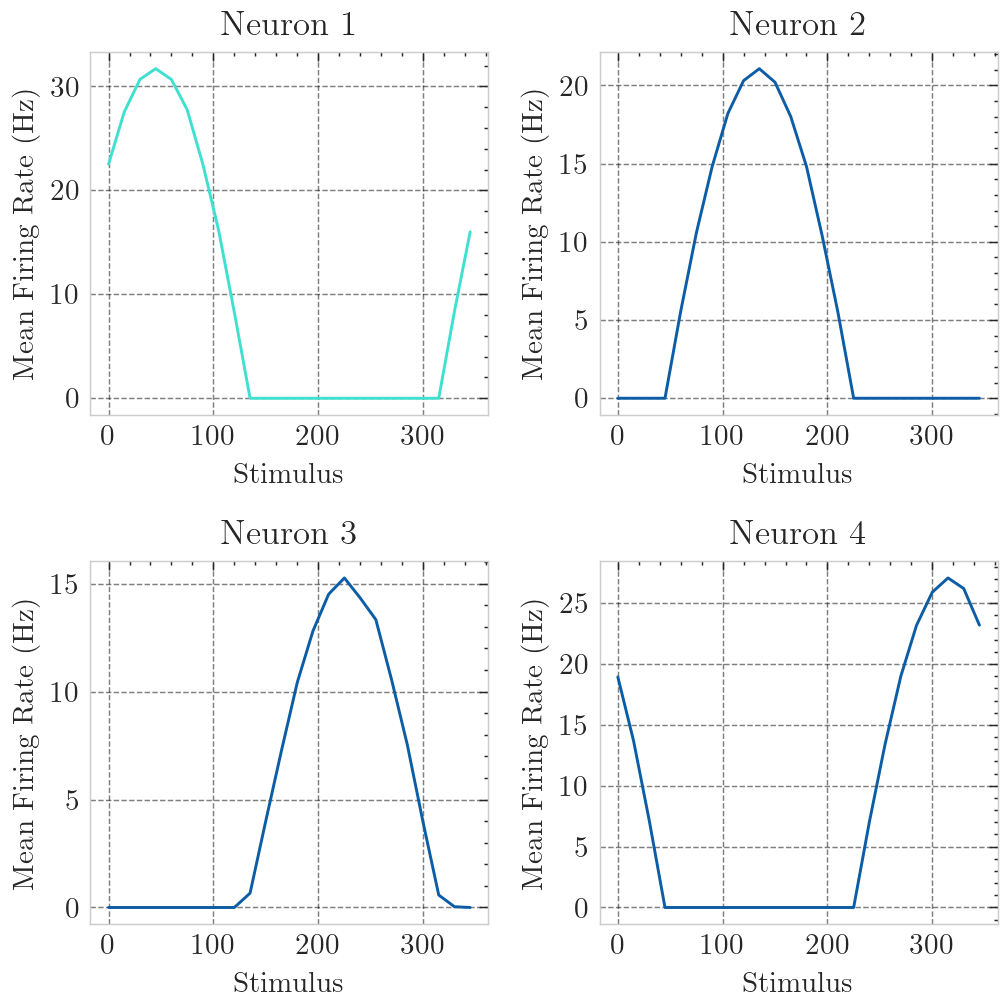

In [128]:
# Calculate the mean firing rate for each neuron
mean_firing_rate_neuron1 = np.mean(neuron1, axis=0)
mean_firing_rate_neuron2 = np.mean(neuron2, axis=0)
mean_firing_rate_neuron3 = np.mean(neuron3, axis=0)
mean_firing_rate_neuron4 = np.mean(neuron4, axis=0)

# Plotting the tuning curves
fig, ax = plt.subplots(2, 2, dpi=210, figsize=(5, 5))

ax[0, 0].plot(stimulus, mean_firing_rate_neuron1, color = 'turquoise', alpha = 1)
ax[0, 0].set_title('Neuron 1')
ax[0, 0].set_xlabel('Stimulus')
ax[0, 0].set_ylabel('Mean Firing Rate (Hz)')

ax[0, 1].plot(stimulus, mean_firing_rate_neuron2)
ax[0, 1].set_title('Neuron 2')
ax[0, 1].set_xlabel('Stimulus')
ax[0, 1].set_ylabel('Mean Firing Rate (Hz)')

ax[1, 0].plot(stimulus, mean_firing_rate_neuron3)
ax[1, 0].set_title('Neuron 3')
ax[1, 0].set_xlabel('Stimulus')
ax[1, 0].set_ylabel('Mean Firing Rate (Hz)')

ax[1, 1].plot(stimulus, mean_firing_rate_neuron4)
ax[1, 1].set_title('Neuron 4')
ax[1, 1].set_xlabel('Stimulus')
ax[1, 1].set_ylabel('Mean Firing Rate (Hz)')

plt.tight_layout()
plt.show()

## question 9

In [123]:
FILENAME2 = 'resources/module 4/pop_coding_3.4.pickle'

with open(FILENAME2, 'rb') as f:
    data2 = pickle.load(f)
    
data2.keys()

c1 = data2['c1'].reshape(1, -1)
r1 = data2['r1'].reshape(-1, 1)
r1_max = np.max(r1)
r1_norm = r1 / r1_max

c2 = data2['c2'].reshape(1, -1)
r2 = data2['r2'].reshape(-1, 1)
r2_max = np.max(r2)
r2_norm = r2 / r2_max

c3 = data2['c3'].reshape(1, -1)
r3 = data2['r3'].reshape(-1, 1)
# null-vector
r3_norm = r3 

c4 = data2['c4'].reshape(1, -1)
r4 = data2['r4'].reshape(-1, 1)
#null-vector
r4_norm = r4 

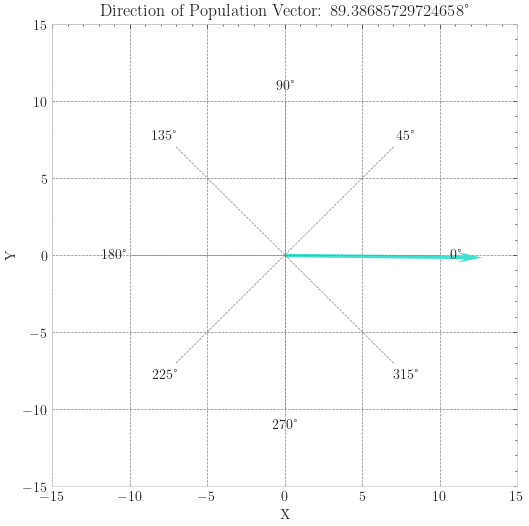

array([12.69077441, -0.13581372])

In [173]:
# Plotting the population coding

v = r1_norm @ c1 + r2_norm @ c2 + r3_norm @ c3 + r4_norm @ c4

# Sum the vectors to get the overall population vector
V_sum = np.sum(v, axis=0)

# Compute the direction in radians and then convert to degrees
theta = np.arctan2(V_sum[1], V_sum[0]) * 180 / np.pi
theta = (theta + 90) % 360  # Ensure it is within [0, 360] degrees

# Plot the population vector and its angle
fig1, ax = plt.subplots(figsize=(6, 6))
ax.quiver(0, 0, V_sum[0], V_sum[1], angles='xy', scale_units='xy', scale=1, color='turquoise',
          headwidth=3, headlength=7, headaxislength=5)  # Adjusted arrow head parameters
ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title(f'Direction of Population Vector: {theta}°')

# Add polar plot for angles
for angle in range(0, 360, 45):
    x = 10 * np.cos(np.radians(angle))
    y = 10 * np.sin(np.radians(angle))
    ax.plot([0, x], [0, y], 'gray', linestyle='--', linewidth=0.5)
    ax.text(x * 1.1, y * 1.1, f'{angle}°', horizontalalignment='center', verticalalignment='center')

plt.show()

V_sum